## Twitter Data Analysis
* Connecting to twitter.com using a user authentication and its api.
* we can search tweets and get sentiment on about any topic using wide variety of methods.

In [16]:
import tweepy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Variables that contains the user specific credentials to access Twitter API
# Please create yours by going to https://developer.twitter.com/en 
access_token = "797427780162121728-dGSMAkmexIMX7nBr0buTJ1PQqgNj6Nl"
access_token_secret = "tbDj0egfypeU3NVTZSMaPjwSAYrdfH6Bqgb645IxnPULO"
consumer_key = "jZDGO8YAQbSxRT3n4I0tVrekb"
consumer_secret = "Tvj0O5LgWnkkFMFtSNFJmbIIypMQlZ8x41qIHPkdfcp4XpygpS"

In [18]:
# Connecting to twitter using user credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Searching about any keyword in all the latest tweets from delhi
tweets_data=api.search('covid',count=100, lang='en', include_rts=False, tweet_mode="extended",
                      geocode="22.5726,88.3638,50km", )
print ("number of tweets found: "+ str(len(tweets_data)))


# Creating an empty data frame to store the tweets
tweets = pd.DataFrame()

# Extracting the tweet metadata
for status in tweets_data:
    tweets=tweets.append(status._json, ignore_index=True)

number of tweets found: 100


In [19]:
# Looking at the data collected
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,id,...,retweet_count,retweeted,source,truncated,user,retweeted_status,extended_entities,quoted_status,quoted_status_id,quoted_status_id_str
0,None,None,Tue Nov 17 15:11:00 +0000 2020,"[0, 236]","{'hashtags': [], 'symbols': [], 'user_mentions...",2.0,0.0,The total coronavirus cases in India mounted t...,None,1.328717e+18,...,0.0,0.0,"<a href=""https://about.twitter.com/products/tw...",0.0,"{'id': 141080858, 'id_str': '141080858', 'name...",NaN,NaN,NaN,NaN,NaN
1,None,None,Tue Nov 17 15:08:51 +0000 2020,"[0, 140]","{'hashtags': [{'text': 'COVID19', 'indices': [...",0.0,0.0,RT @DebjaniBhatta20: Patients who are dying of...,None,1.328717e+18,...,4.0,0.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,"{'id': 384280352, 'id_str': '384280352', 'name...",{'created_at': 'Tue Nov 17 08:57:05 +0000 2020...,NaN,NaN,NaN,NaN
2,None,None,Tue Nov 17 15:04:07 +0000 2020,"[0, 275]","{'hashtags': [{'text': 'icaiexams', 'indices':...",1.0,0.0,Questions:\nFAQs\nRevised SOP\nHow @theicai wi...,None,1.328716e+18,...,0.0,0.0,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1114770746008580096, 'id_str': '1114770...",NaN,NaN,NaN,NaN,NaN
3,None,None,Tue Nov 17 15:03:16 +0000 2020,"[0, 199]","{'hashtags': [{'text': 'Delhi', 'indices': [11...",0.0,0.0,RT:@moneycontrolcom:COVID-19 Update: Delhi see...,None,1.328715e+18,...,0.0,0.0,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",0.0,"{'id': 2402570365, 'id_str': '2402570365', 'na...",NaN,"{'media': [{'id': 1328678808690380800, 'id_str...",NaN,NaN,NaN
4,None,None,Tue Nov 17 15:02:30 +0000 2020,"[0, 170]","{'hashtags': [{'text': 'JanAndolan', 'indices'...",0.0,0.0,#JanAndolan Battle with #Covid_19 is still on....,None,1.328715e+18,...,0.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 1207187623980093440, 'id_str': '1207187...",NaN,"{'media': [{'id': 1328715129513504768, 'id_str...",NaN,NaN,NaN


In [20]:
# Looking at only the tweet texts
tweets['full_text'].unique()

array(['The total coronavirus cases in India mounted to 88,74,290 with 29,163 infections being reported in a day while the death toll climbed to 1,30,519 with 449 new fatalities, the data updated at 8am on Tuesday showed\nhttps://t.co/JNKZ8N4tcz',
       'RT @DebjaniBhatta20: Patients who are dying of #COVID19 in #WestBengal are being cremated separately in a place called Dhapa. Corpses r not…',
       'Questions:\nFAQs\nRevised SOP\nHow @theicai will inform the center if anyone gets COVID during exams?\nHow will conduct exams during Transport strike?\nWhat about other students if one student gets covid in the center?\n\nAnswer From @theicai : EXAMS ARE AS PER SCHEDULE.\n#icaiexams',
       'RT:@moneycontrolcom:COVID-19 Update: Delhi sees 1 lakh new cases; 1,200 deaths; 94,000 recoveries since Nov 1. \n\n#Delhi #CoronavirusUpdates #Lockdown | https://t.co/EN7uAo4r5h https://t.co/Qf68gsIOzE',
       '#JanAndolan Battle with #Covid_19 is still on. Only together we can flatten the curve. 

## Sentiment analysis
Using bag of words model, finding the sentiment of every tweet found

In [21]:
import pandas as pd
NegativeWords=pd.read_table(r'C:\Users\SAYAN\Desktop\Python Datasets\Sentiment Analysis\Negative_words.txt',encoding='latin-1')
PositiveWords=pd.read_table(r'C:\Users\SAYAN\Desktop\Python Datasets\Sentiment Analysis\Positive_words.txt',encoding='latin-1')

In [22]:
# Defining a function to take a sentence as input and provide a sentiment fo it.
def ComputeSentimentScore(inputSentence):
    import re
    
    PositiveScore=0
    NegativeScore=0
    OverallSentiment=''
    
    # converting every word in lowercase
    newSentence=inputSentence.lower()
    
    # Removing everything which is not alphabets
    WordList= re.sub(r'[^a-z A-Z]',r'',newSentence)
    
    # Splitting the sentence into list of words
    WordList=WordList.split()
    
    # Iterate every word and check if it is present in the positive or negative word list
    for newWord in WordList:
        #print(newWord)
        if (newWord in NegativeWords.values):
            NegativeScore+=1
        if (newWord in PositiveWords.values):
            PositiveScore+=1
    #print('Final Positive Score:',PositiveScore)
    #print('Final Negative Score:',NegativeScore)
    #print('Overall Score:',PositiveScore-NegativeScore)
    
    if((PositiveScore-NegativeScore) > 0):
        OverallSentiment='Positive'
    
    elif((PositiveScore-NegativeScore) == 0):
        OverallSentiment='Neutral'
    
    else:
        OverallSentiment='Negative'
        
    return(OverallSentiment)

In [23]:
# Calling sentiment score function for every tweet
tweets['Sentiment']=tweets['full_text'].apply(ComputeSentimentScore)

# Printing sample rows to understand
tweets[['full_text', 'Sentiment']].head()

,full_text,Sentiment
0,The total coronavirus cases in India mounted t...,Negative
1,RT @DebjaniBhatta20: Patients who are dying of...,Negative
2,Questions:\nFAQs\nRevised SOP\nHow @theicai wi...,Neutral
3,RT:@moneycontrolcom:COVID-19 Update: Delhi see...,Neutral
4,#JanAndolan Battle with #Covid_19 is still on....,Positive


<AxesSubplot:ylabel='None'>

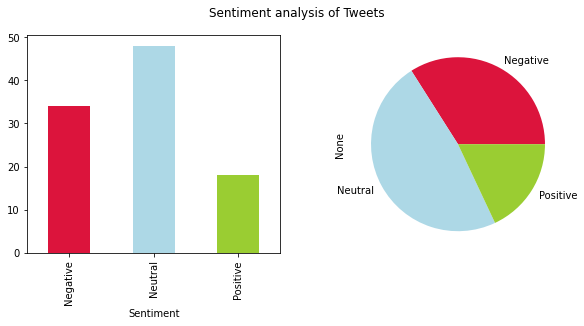

In [24]:
# Visualizing the overall sentiment distribution
%matplotlib inline
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Tweets")

# Grouping the data
GroupedData=tweets.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'lightblue','yellowgreen'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'lightblue','yellowgreen'])

## Wordcloud analysis

In [25]:
# Extracting only the Tweet text
Tweet_Texts=tweets['full_text'].values

# Converting the text column as a single string for wordcloud
Tweets_String=str(Tweet_Texts)

In [26]:
# Observing the tweets text for junk
print(Tweets_String)

['The total coronavirus cases in India mounted to 88,74,290 with 29,163 infections being reported in a day while the death toll climbed to 1,30,519 with 449 new fatalities, the data updated at 8am on Tuesday showed\nhttps://t.co/JNKZ8N4tcz'
 'RT @DebjaniBhatta20: Patients who are dying of #COVID19 in #WestBengal are being cremated separately in a place called Dhapa. Corpses r not…'
 'Questions:\nFAQs\nRevised SOP\nHow @theicai will inform the center if anyone gets COVID during exams?\nHow will conduct exams during Transport strike?\nWhat about other students if one student gets covid in the center?\n\nAnswer From @theicai : EXAMS ARE AS PER SCHEDULE.\n#icaiexams'
 'RT:@moneycontrolcom:COVID-19 Update: Delhi sees 1 lakh new cases; 1,200 deaths; 94,000 recoveries since Nov 1. \n\n#Delhi #CoronavirusUpdates #Lockdown | https://t.co/EN7uAo4r5h https://t.co/Qf68gsIOzE'
 '#JanAndolan Battle with #Covid_19 is still on. Only together we can flatten the curve. Follow covid appropriate behaviour

### Data Preprocessing: Cleaning the text

In [27]:
# Tweet Text cleaning
import re

# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)


# Deleting any word which is less than 4-characters mostly those are stopwords
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,3}\b', '', Tweet_Texts_Cleaned)

# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

Tweet_Texts_Cleaned

' total coronavirus cases india mounted with infections being reported while death toll climbed with fatalities data updated tuesday showed patients dying covid westbengal being cremated separately place called dhapa corpses questions nfaqs nrevised nhow will inform center anyone gets covid during exams nhow will conduct exams during transport strike nwhat about other students student gets covid center nanswer from exams schedule icaiexams covid update delhi sees lakh cases deaths recoveries since delhi coronavirusupdates lockdown janandolan battle with covid still only together flatten curve follow covid appropriate behaviour stop spread children forgotten victims pandemic covid severely affected just children health caused children forgotten victims pandemic covid severely affected just children health caused many them drop school join ndtv unicef special campaign help protect most vulnerable children exactly think bolege bihario wajah covid spread govt arrangememt krne chahiye speci

### Generating the wordcloud

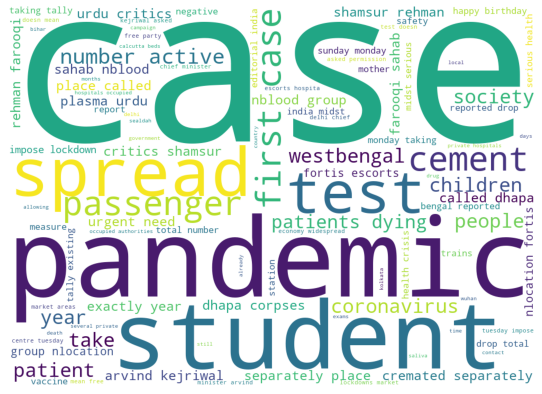

In [28]:
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt

# Creating the custom stopwords
customStopwords=list(STOPWORDS)+ ['covid','corona','virus','rt','day','https','will']

wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(Tweet_Texts_Cleaned)

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

In [29]:
# Tweet Text cleaning
import re

# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)


# Deleting any word which is less than 4-characters mostly those are stopwords
#Tweet_Texts_Cleaned= re.sub(r'\b\w{1,3}\b', '', Tweet_Texts_Cleaned)

# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

Tweet_Texts_Cleaned

' the total coronavirus cases in india mounted to with infections being reported in a day while the death toll climbed to with new fatalities the data updated at am on tuesday showed n rt patients who are dying of covid in westbengal are being cremated separately in a place called dhapa corpses r not questions nfaqs nrevised sop nhow will inform the center if anyone gets covid during exams nhow will conduct exams during transport strike nwhat about other students if one student gets covid in the center n nanswer from exams are as per schedule n icaiexams rt covid update delhi sees lakh new cases deaths recoveries since nov n n delhi coronavirusupdates lockdown janandolan battle with covid is still on only together we can flatten the curve follow covid appropriate behaviour to stop the spread n rt children are the forgotten victims of the pandemic covid has severely affected not just children s health but has caused ma children are the forgotten victims of the pandemic covid has severel

## Bigram/Trigram Wordcloud

##### Important word combinations ####
total_coronavirus_cases death_toll new_fatalities n_rt_patients dhapa_corpses_r questions_nfaqs sop_nhow exams_nhow conduct_exams transport_strike_nwhat center_n_nanswer schedule_n_icaiexams_rt_covid_update_delhi new_cases_deaths_recoveries nov_n_n_delhi_coronavirusupdates_lockdown_janandolan_battle appropriate_behaviour n_rt_children forgotten_victims pandemic_covid children_s_health ma_children forgotten_victims pandemic_covid children_s_health special_campaign vulnerable_children_yes ab_koi_yeh_ni_bolege_ki_bihario_ke_wajah_se_covid govt_ko_kch_arrangememt_krne_chahiye bihar_ghaat covid_cases concern_yaha_sirf_air_se_virus hne_ki_baat_ni_hai paani_se_bhi_hai_doobki_wagerah_lgate_hai_log yeh_alertness_sbhi_festivities_pe_rehnin_chahiye_mukhota_aur_mask_covid_pandemic n_npoetry n_n_poetry_sadness_lonliness singersongwriter_hindi_hindishayari_covid_pandemic_rt_friendsofne_n_harkaamdeshkenaam_n_n_students miao_kharsang changlang_arunachalpradesh_be

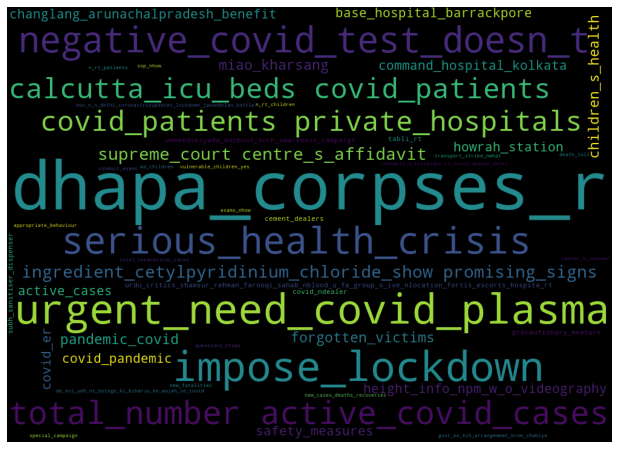

In [30]:
from textblob import TextBlob

# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(Tweet_Texts_Cleaned)

# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases=SampleTextInBlobFormat.noun_phrases

# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
print('##### Important word combinations ####')
print(NewNounString)

########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['less','Trump','American','politics','country']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(NewNounString)

plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()